# The app

In [170]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('heart_2020_cleaned.csv')
print(df.head())

  HeartDisease    BMI Smoking AlcoholDrinking Stroke  PhysicalHealth  \
0           No  16.60     Yes              No     No             3.0   
1           No  20.34      No              No    Yes             0.0   
2           No  26.58     Yes              No     No            20.0   
3           No  24.21      No              No     No             0.0   
4           No  23.71      No              No     No            28.0   

   MentalHealth DiffWalking     Sex  AgeCategory   Race Diabetic  \
0          30.0          No  Female        55-59  White      Yes   
1           0.0          No  Female  80 or older  White       No   
2          30.0          No    Male        65-69  White      Yes   
3           0.0          No  Female        75-79  White       No   
4           0.0         Yes  Female        40-44  White       No   

  PhysicalActivity  GenHealth  SleepTime Asthma KidneyDisease SkinCancer  
0              Yes  Very good        5.0    Yes            No        Yes  
1       

In [171]:
df.dropna(inplace=True)

In [172]:
def binarize(row):

    if row == "Yes":

        return 1

    elif row == "No":

        return 0
df["HeartDisease"] = df["HeartDisease"].apply(binarize)
df["Smoking"] = df["Smoking"].apply(binarize)
df["AlcoholDrinking"] = df["AlcoholDrinking"].apply(binarize)
df["Stroke"] = df["Stroke"].apply(binarize)
df["DiffWalking"] = df["DiffWalking"].apply(binarize)
df["Diabetic"] = df["Diabetic"].apply(binarize)
df["PhysicalActivity"] = df["PhysicalActivity"].apply(binarize)
df["Asthma"] = df["Asthma"].apply(binarize)
df["KidneyDisease"] = df["KidneyDisease"].apply(binarize)
df["SkinCancer"] = df["SkinCancer"].apply(binarize)
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,55-59,White,1.0,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,80 or older,White,0.0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,65-69,White,1.0,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,75-79,White,0.0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,40-44,White,0.0,1,Very good,8.0,0,0,0


In [173]:
# heartdisease_dummies = pd.get_dummies(df['HeartDisease'])
# smoking_dummies = pd.get_dummies(df['Smoking'])
# alcoholdrinking_dummies = pd.get_dummies(df['AlcoholDrinking'])
# stroke_dummies = pd.get_dummies(df['Stroke'])
# diffwalking_dummies = pd.get_dummies(df['DiffWalking'])
sex_dummies = pd.get_dummies(df['Sex'])
race_dummies = pd.get_dummies(df['Race'])
# diabetic_dummies = pd.get_dummies(df['Diabetic'])

In [174]:
#print(df['AgeCategory'].unique())
# print(df['Race'].unique())
print(df['GenHealth'].unique())

['Very good' 'Fair' 'Good' 'Poor' 'Excellent']


In [175]:
def categorise_GenHealth(Genhealth):
    if Genhealth == "Poor":
        return 4
    elif Genhealth == "Fair":
        return 3
    elif Genhealth == "Good":
        return 2
    elif Genhealth == "Very good":
        return 1
    elif Genhealth == "Excellent":
        return 0
df['GenHealth'] = df['GenHealth'].apply(categorise_GenHealth)

In [176]:
df['GenHealth'].value_counts()

1    113858
2     93129
0     66842
3     34677
4     11289
Name: GenHealth, dtype: int64

In [177]:
def categorise_Ages(Age):
    if Age == "18-24":
        return 0
    elif Age == "25-29":
        return 1
    elif Age == "30-34":
        return 2
    elif Age == "35-39":
        return 3
    elif Age == "40-44":
        return 4
    elif Age == "45-49":
        return 5
    elif Age == "50-54":
        return 6
    elif Age == "55-59":
        return 7
    elif Age == "60-64":
        return 8
    elif Age == "65-69":
        return 9
    elif Age == "70-74":
        return 10
    elif Age == "75-79":
        return 11
    elif Age == "80 or older":
        return 12

df['AgeCategory'] = df['AgeCategory'].apply(categorise_Ages)

In [178]:
df['AgeCategory'].value_counts()

9     34151
8     33686
10    31065
7     29757
6     25382
12    24153
5     21791
11    21482
0     21064
4     21006
3     20550
2     18753
1     16955
Name: AgeCategory, dtype: int64

In [179]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,Female,7,White,1.0,1,1,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,Female,12,White,0.0,1,1,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,Male,9,White,1.0,1,3,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,Female,11,White,0.0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,Female,4,White,0.0,1,1,8.0,0,0,0


In [180]:
df = pd.concat([sex_dummies, df],axis=1)
df.drop(["Sex", "Race"],axis=1, inplace=True)
df.head()

,Female,Male,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1,0,0,16.60,1,0,0,3.0,30.0,0,7,1.0,1,1,5.0,1,0,1
1,1,0,0,20.34,0,0,1,0.0,0.0,0,12,0.0,1,1,7.0,0,0,0
2,0,1,0,26.58,1,0,0,20.0,30.0,0,9,1.0,1,3,8.0,1,0,0
3,1,0,0,24.21,0,0,0,0.0,0.0,0,11,0.0,0,2,6.0,0,0,1
4,1,0,0,23.71,0,0,0,28.0,0.0,1,4,0.0,1,1,8.0,0,0,0


In [181]:
# df_prepped = df.join(sex_dummies)
# df_prepped = df_prepped.join(race_dummies)

In [182]:
for column in df.columns:

    df[column].abs().max()

    print(column ,df[column].abs().max())


Female 1
Male 1
HeartDisease 1
BMI 94.85
Smoking 1
AlcoholDrinking 1
Stroke 1
PhysicalHealth 30.0
MentalHealth 30.0
DiffWalking 1
AgeCategory 12
Diabetic 1.0
PhysicalActivity 1
GenHealth 4
SleepTime 24.0
Asthma 1
KidneyDisease 1
SkinCancer 1


In [183]:
df["SleepTime"].value_counts()
print(df["SleepTime"].value_counts())

7.0     97751
8.0     97602
6.0     66721
5.0     19184
9.0     16041
10.0     7796
4.0      7750
12.0     2205
3.0      1992
2.0       788
1.0       551
11.0      415
14.0      243
16.0      236
15.0      189
18.0      102
13.0       97
20.0       64
24.0       30
17.0       21
22.0        9
19.0        3
23.0        3
21.0        2
Name: SleepTime, dtype: int64


In [184]:
# apply normalization techniques

for column in df.columns:

    df[column] = df[column]  / df[column].abs().max()


In [185]:
df.head()

,Female,Male,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,AgeCategory,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,1.0,0.0,0.0,0.175013,1.0,0.0,0.0,0.100000,1.0,0.0,0.583333,1.0,1.0,0.25,0.208333,1.0,0.0,1.0
1,1.0,0.0,0.0,0.214444,0.0,0.0,1.0,0.000000,0.0,0.0,1.000000,0.0,1.0,0.25,0.291667,0.0,0.0,0.0
2,0.0,1.0,0.0,0.280232,1.0,0.0,0.0,0.666667,1.0,0.0,0.750000,1.0,1.0,0.75,0.333333,1.0,0.0,0.0
3,1.0,0.0,0.0,0.255245,0.0,0.0,0.0,0.000000,0.0,0.0,0.916667,0.0,0.0,0.50,0.250000,0.0,0.0,1.0
4,1.0,0.0,0.0,0.249974,0.0,0.0,0.0,0.933333,0.0,1.0,0.333333,0.0,1.0,0.25,0.333333,0.0,0.0,0.0


                    Female      Male  HeartDisease       BMI   Smoking  \
Female            1.000000 -1.000000     -0.070040 -0.026940 -0.085052   
Male             -1.000000  1.000000      0.070040  0.026940  0.085052   
HeartDisease     -0.070040  0.070040      1.000000  0.051803  0.107764   
BMI              -0.026940  0.026940      0.051803  1.000000  0.023118   
Smoking          -0.085052  0.085052      0.107764  0.023118  1.000000   
AlcoholDrinking  -0.004200  0.004200     -0.032080 -0.038816  0.111768   
Stroke            0.003091 -0.003091      0.196835  0.019733  0.061226   
PhysicalHealth    0.040904 -0.040904      0.170721  0.109788  0.115352   
MentalHealth      0.100058 -0.100058      0.028591  0.064131  0.085157   
DiffWalking       0.068860 -0.068860      0.201258  0.181678  0.120074   
AgeCategory       0.067478 -0.067478      0.233432 -0.004744  0.128331   
Diabetic         -0.017768  0.017768      0.186963  0.211044  0.059663   
PhysicalActivity -0.048247  0.048247  

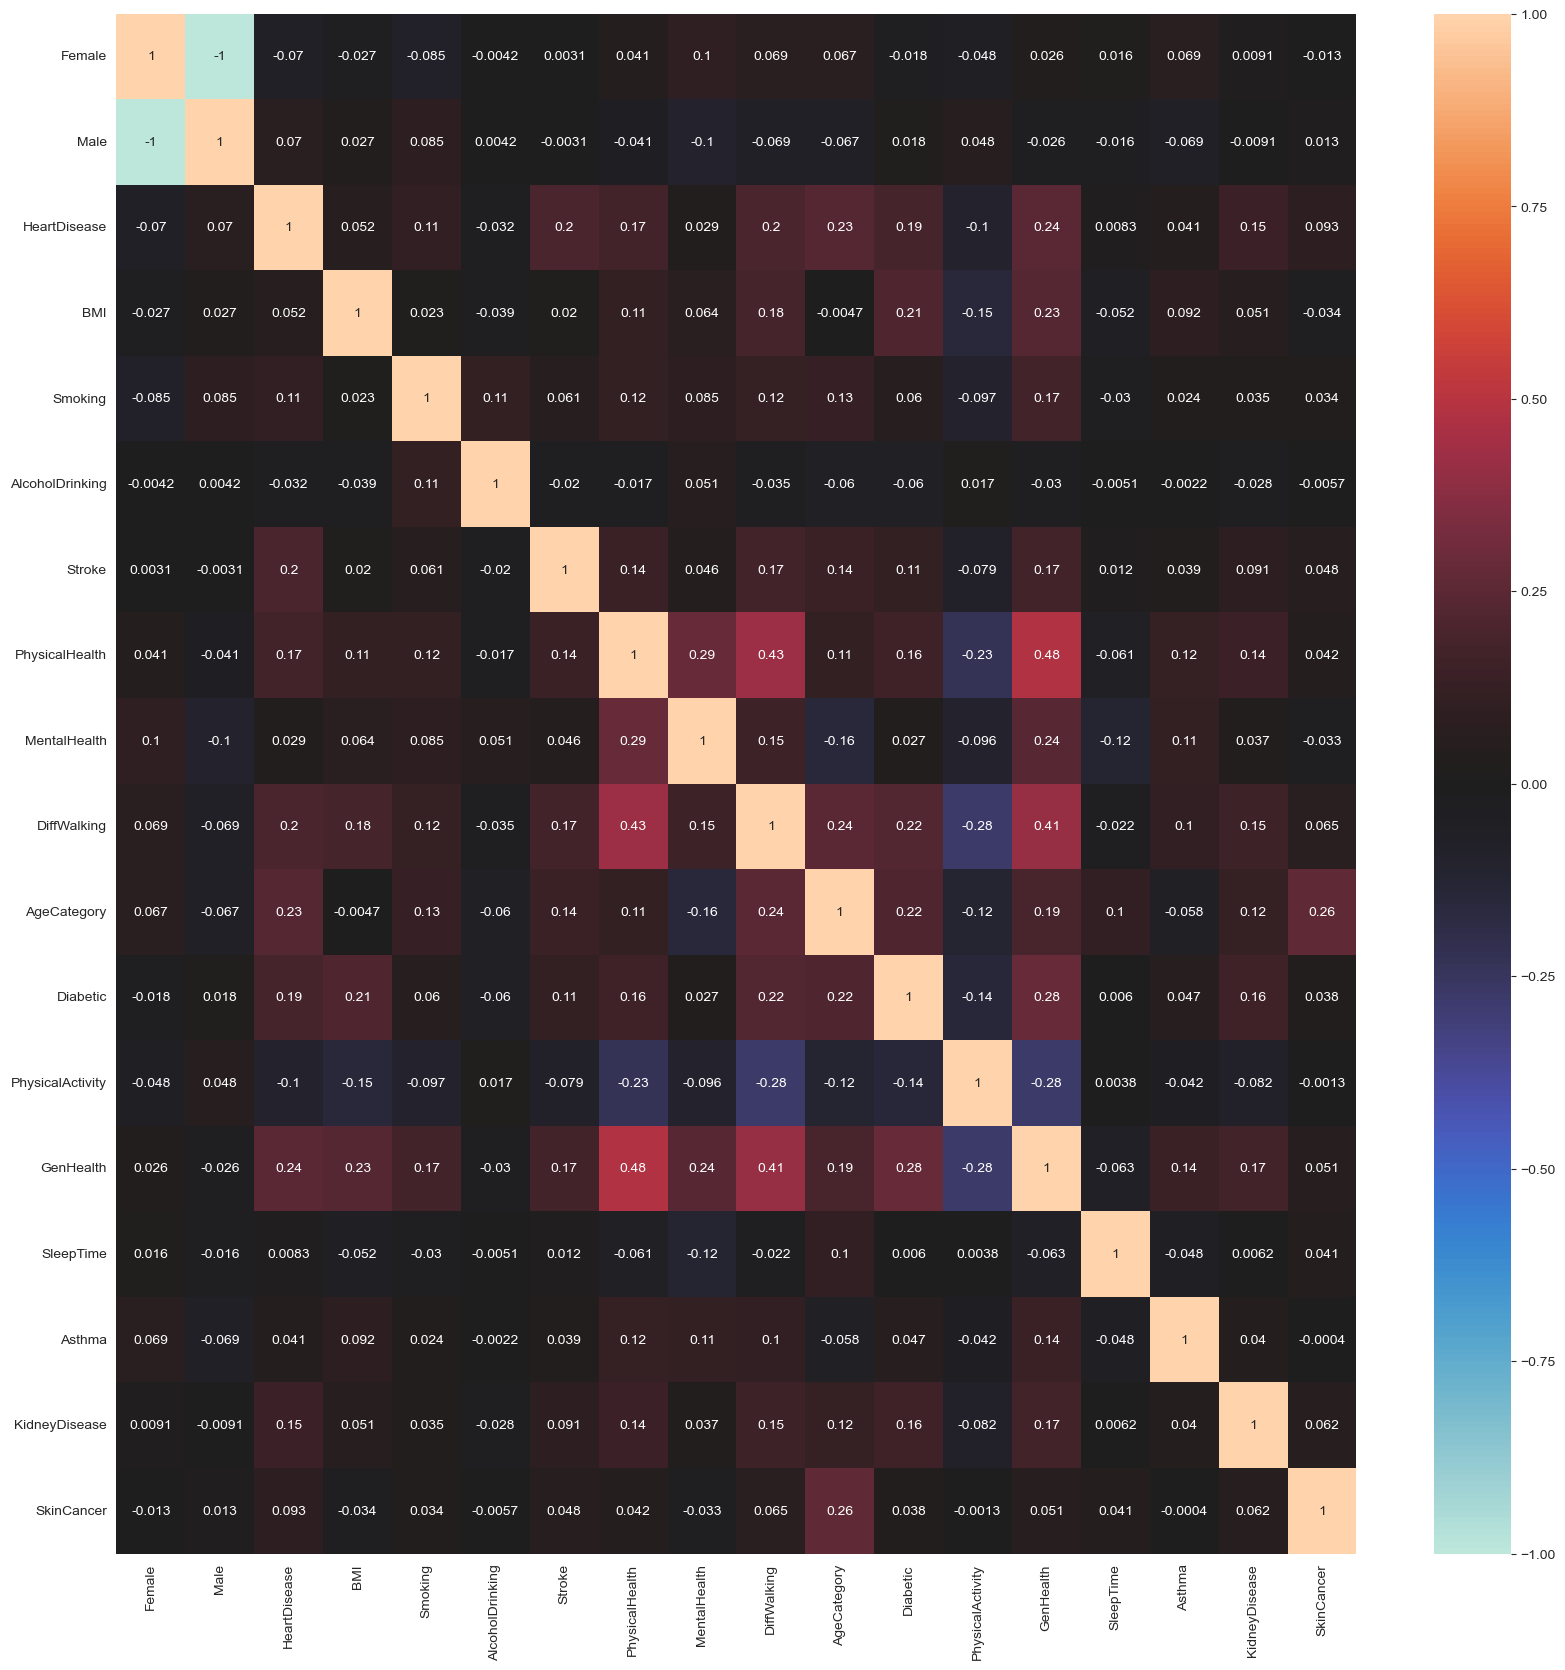

In [186]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, ax=ax)
print(df.corr())

In [187]:
df["Diabetic"].fillna(0, inplace=True)

for column in df.columns:
    print(column, df[column].isna().sum())

Female 0
Male 0
HeartDisease 0
BMI 0
Smoking 0
AlcoholDrinking 0
Stroke 0
PhysicalHealth 0
MentalHealth 0
DiffWalking 0
AgeCategory 0
Diabetic 0
PhysicalActivity 0
GenHealth 0
SleepTime 0
Asthma 0
KidneyDisease 0
SkinCancer 0


In [188]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam, Adagrad, RMSprop
from tensorflow.keras.utils import to_categorical
#from sklearn.model_selection import train_test_split

In [189]:
# create model

model = Sequential()

model.add(Dense(6, input_shape=(df.shape[1]-1,), activation='relu'))

model.add(Dense(1, activation='sigmoid'))

# Compile model

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(df.drop("HeartDisease",axis=1), df["HeartDisease"], epochs=100,
            validation_split=0.1, batch_size=10,
            verbose=2)
history

Epoch 1/100
28782/28782 - 29s - loss: 0.2347 - accuracy: 0.9154 - val_loss: 0.2336 - val_accuracy: 0.9150 - 29s/epoch - 1ms/step
Epoch 2/100
28782/28782 - 29s - loss: 0.2264 - accuracy: 0.9160 - val_loss: 0.2333 - val_accuracy: 0.9149 - 29s/epoch - 1ms/step
Epoch 3/100
28782/28782 - 31s - loss: 0.2263 - accuracy: 0.9161 - val_loss: 0.2321 - val_accuracy: 0.9152 - 31s/epoch - 1ms/step
Epoch 4/100
28782/28782 - 29s - loss: 0.2261 - accuracy: 0.9160 - val_loss: 0.2321 - val_accuracy: 0.9151 - 29s/epoch - 994us/step
Epoch 5/100
28782/28782 - 28s - loss: 0.2260 - accuracy: 0.9161 - val_loss: 0.2329 - val_accuracy: 0.9146 - 28s/epoch - 982us/step
Epoch 6/100
28782/28782 - 29s - loss: 0.2260 - accuracy: 0.9161 - val_loss: 0.2321 - val_accuracy: 0.9152 - 29s/epoch - 993us/step
Epoch 7/100
28782/28782 - 28s - loss: 0.2259 - accuracy: 0.9160 - val_loss: 0.2325 - val_accuracy: 0.9147 - 28s/epoch - 987us/step
Epoch 8/100
28782/28782 - 29s - loss: 0.2259 - accuracy: 0.9160 - val_loss: 0.2323 - val_

In [190]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets


In [191]:
test = {
  "BMI": [
    0.5482340537691092
  ],
  "Male": [
    1
  ],
  "Female": [
    0
  ],
  "AgeCategory": [
    0.3333333333333333
  ],
  "Smoking": [
    1
  ],
  "Diabetic": [
    1
  ],
  "PhysicalActivity": [
    1
  ],
  "Asthma": [
    1
  ],
  "KidneyDisease": [
    1
  ],
  "SkinCancer": [
    1
  ],
  "AlcoholDrinking": [
    1
  ],
  "Stroke": [
    1
  ],
  "PhysicalHealth": [
    0.5
  ],
  "MentalHealth": [
    0.4666666666666667
  ],
  "DiffWalking": [
    1
  ],
  "GenHealth": [
    0.75
  ],
  "SleepTime": [
    0.3333333333333333
  ]
}
model.predict(pd.DataFrame(test))
print(model.predict(pd.DataFrame(test))[0][0])

1/1 [==============================] - 0s 28ms/step
0.33835733
